In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

In [5]:
rcParams['figure.figsize'] = [14, 10]
rcParams['font.size'] = 22

In [11]:
def load_data(file_name):
    data = np.loadtxt(file_name)
    Ts = data[:, 0]
    Es = data[:, 1]
    Cs = data[:, 2]
    Ms = data[:, 3]
    Xs = data[:, 4]
    Bs = data[:, 5]
    return Ts, Es, Cs, Ms, Xs, Bs

In [28]:
def plot_data(x, y, xlabel=None, ylabel=None, title=None):
    plt.plot(x, y, linestyle='None', marker='o', color='purple', markersize=12)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel, rotation=0)
    if title is not None:
        plt.title(title)

In [29]:
Ts, Es, Cs, Ms, Xs, Bs = load_data('data.out')

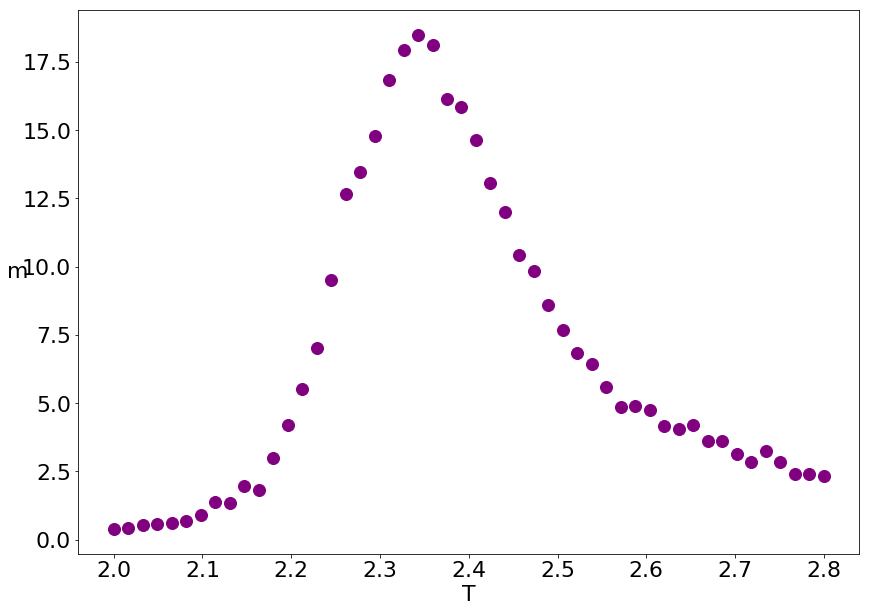

In [33]:
plot_data(Ts, Xs, xlabel="T", ylabel="m")